# NETWORK INTRUSION DETECTION

## Libraries

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

# import xgboost as xgb
# from xgboost import plot_importance
import time

In [2]:
import sys

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Read the CICIDS2017 dataset

In [4]:
for dirname, _, filenames in os.walk(r"C:\Users\HP\Downloads\Network Intrusion dataset(CIC-IDS- 2017)"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\HP\Downloads\Network Intrusion dataset(CIC-IDS- 2017)\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
C:\Users\HP\Downloads\Network Intrusion dataset(CIC-IDS- 2017)\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
C:\Users\HP\Downloads\Network Intrusion dataset(CIC-IDS- 2017)\Friday-WorkingHours-Morning.pcap_ISCX.csv
C:\Users\HP\Downloads\Network Intrusion dataset(CIC-IDS- 2017)\Monday-WorkingHours.pcap_ISCX.csv
C:\Users\HP\Downloads\Network Intrusion dataset(CIC-IDS- 2017)\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
C:\Users\HP\Downloads\Network Intrusion dataset(CIC-IDS- 2017)\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
C:\Users\HP\Downloads\Network Intrusion dataset(CIC-IDS- 2017)\Tuesday-WorkingHours.pcap_ISCX.csv
C:\Users\HP\Downloads\Network Intrusion dataset(CIC-IDS- 2017)\Wednesday-workingHours.pcap_ISCX.csv


In [35]:


path = r"C:\Users\HP\Downloads\Network Intrusion dataset(CIC-IDS- 2017)"
df1 = pd.read_csv(f"{path}\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df2 = pd.read_csv(f"{path}\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df3 = pd.read_csv(f"{path}\Tuesday-WorkingHours.pcap_ISCX.csv")
df4 = pd.read_csv(f"{path}\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df5 = pd.read_csv(f"{path}\Monday-WorkingHours.pcap_ISCX.csv")
df6 = pd.read_csv(f"{path}\Friday-WorkingHours-Morning.pcap_ISCX.csv")
df7 = pd.read_csv(f"{path}\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df8 = pd.read_csv(f"{path}\Wednesday-workingHours.pcap_ISCX.csv")


df = pd.concat([df1,df2])
# df1,df2
df = pd.concat([df,df3])
# del df3
df = pd.concat([df,df4])
# del df4
df = pd.concat([df,df5])
# del df5
df = pd.concat([df,df6])
# del df6
df = pd.concat([df,df7])
# del df7
df = pd.concat([df,df8])
# del df8



In [36]:
df.drop([' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', 'Bwd IAT Total'],  axis=1,inplace=True)
df.drop([' Fwd Header Length.1'], axis=1, inplace=True)


In [37]:
nRow, nCol = df.shape
print(f'The table has {nRow} rows and {nCol} columns')


The table has 2830743 rows and 72 columns


In [38]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [39]:
df.columns  = df.columns.str.strip()
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag 

In [40]:
label_mapping = {
    'BENIGN': 'Normal',
    'Bot': 'Botnet',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'DoS Hulk': 'DoS/DDoS',
    'DoS GoldenEye': 'DoS/DDoS',
    'DoS slowloris': 'DoS/DDoS',
    'DoS Slowhttptest': 'DoS/DDoS',
    'DDoS': 'DoS/DDoS',
    'Heartbleed': 'DoS/DDoS',
    'Infiltration': 'Infiltration',
    'PortScan': 'Port Scan',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack'
}
df['Label'] = df['Label'].map(label_mapping)

## Labels

In [41]:
df.Label.value_counts()

Normal          2273097
DoS/DDoS         380699
Port Scan        158930
Brute Force       13835
Web Attack         2180
Botnet             1966
Infiltration         36
Name: Label, dtype: int64

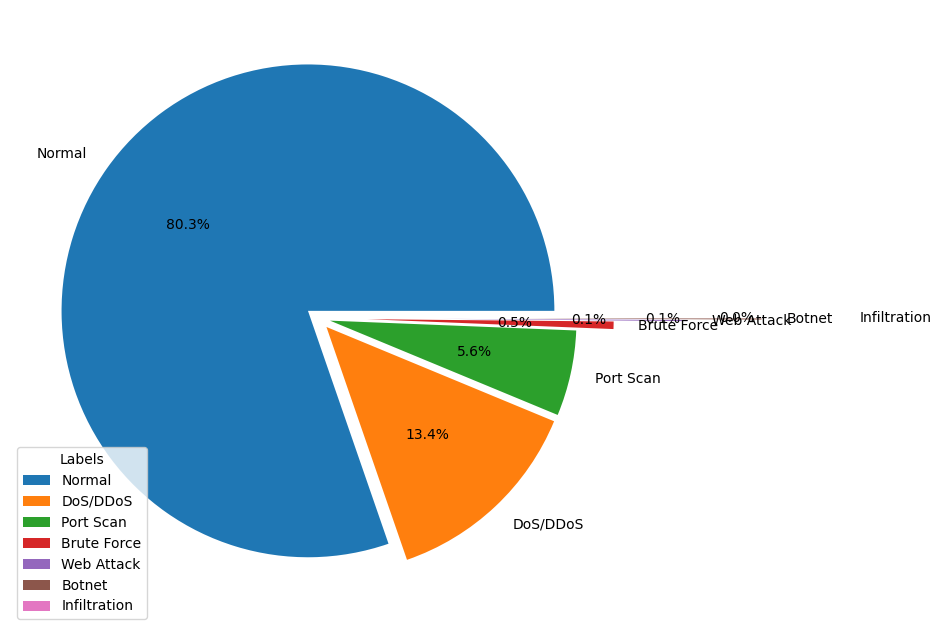

In [42]:
label_counts = df['Label'].value_counts()
explode = [0.05, 0.05, 0.05, 0.2, 0.5, 0.8, 1.1]
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', explode=explode )
plt.legend(label_counts.index, title="Labels", loc="lower left")
plt.show()

## Preprocessing (normalization and handling null values)

In [43]:
df.isna().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 72, dtype: int64

In [44]:
df = df.dropna()

In [45]:
print(df.isna().sum())

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 72, dtype: int64


### Normalization

In [46]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.min()) / (x.max()-x.min()))


In [47]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000336,1.055296e-02,0.000182,0.000151,0.000207,0.000011,0.018372,0.0,0.010937,0.015418,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,0.000336,1.099472e-02,0.000182,0.000151,0.000207,0.000011,0.018372,0.0,0.010937,0.015418,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,0.000336,1.441667e-06,0.000000,0.000003,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,0.000336,1.086251e-02,0.000182,0.000144,0.000211,0.000010,0.018372,0.0,0.011200,0.015456,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,0.540108,7.499999e-07,0.000000,0.000007,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


### Label Encoding

In [48]:
df['Label'].value_counts()

Normal          2272688
DoS/DDoS         379750
Port Scan        158930
Brute Force       13835
Web Attack         2180
Botnet             1966
Infiltration         36
Name: Label, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

y = df.iloc[:, -1].values.reshape(-1,1)
y = np.ravel(y)
y = y.astype('int')

X = df.drop(['Label'],axis=1).values


### split train set and test set

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = y)

In [51]:
X_train.shape

(1980569, 71)

In [52]:
y_test.shape

(848816,)

In [53]:
pd.Series(y_train).value_counts()

4    1590881
2     265825
5     111251
1       9685
6       1526
0       1376
3         25
dtype: int64

## Machine learning model training

## Training : Decision tree

#### Decision tree

In [62]:
# Decision tree training and prediction
import time

start_time = time.time() 

dt = DecisionTreeClassifier(criterion='gini', splitter= 'best', max_depth=5)
dt.fit(X_train,y_train)

training_time = time.time() - start_time

In [159]:
# Decision tree training and prediction
import time

start_time2 = time.time() 

dt2 = DecisionTreeClassifier(criterion='gini', splitter= 'best', max_depth=10)
dt2.fit(X_train,y_train)

training_time2 = time.time() - start_time2

In [114]:
dt_score = dt.score(X_test,y_test)
y_predict = dt.predict(X_test)
y_true = y_test

precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

print('Accuracy of DT: '+ str(dt_score))    
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))

print("Training time:", training_time, "s") 

print(classification_report(y_true,y_predict))


Accuracy of DT: 0.9825038642061412
Precision of DT: 0.9814283597451626
Recall of DT: 0.9825038642061412
F1-score of DT: 0.9816099192776624
Training time: 88.13664078712463 s
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       590
           1       1.00      0.57      0.73      4150
           2       0.93      0.97      0.95    113925
           3       0.00      0.00      0.00        11
           4       0.99      0.99      0.99    681807
           5       0.99      0.99      0.99     47679
           6       0.00      0.00      0.00       654

    accuracy                           0.98    848816
   macro avg       0.56      0.50      0.52    848816
weighted avg       0.98      0.98      0.98    848816



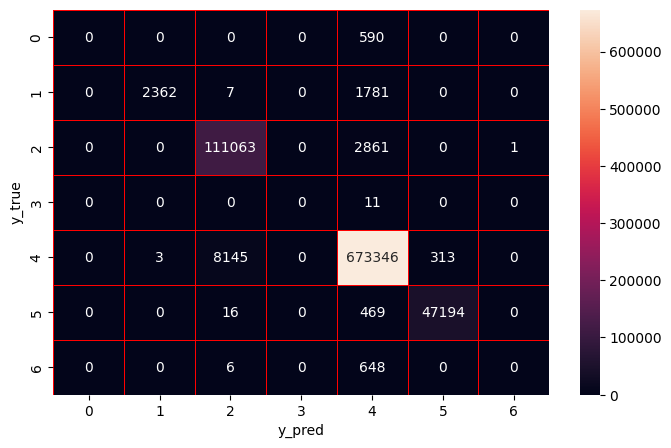

In [120]:
cm = confusion_matrix(y_true,y_predict)
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [100]:
dt_test = dt.predict(X_test)
unique, freq = np.unique(dt_test, return_counts = True)
print(unique)
print(freq)

[1 2 4 5 6]
[  2365 119237 679706  47507      1]


In [160]:
dt_test2 = dt2.predict(X_test)
unique2, freq2 = np.unique(dt_test2, return_counts = True)
print(unique2)
print(freq2)

[0 1 2 3 4 5 6]
[     1   4124 114594      1 681515  47937    644]


#### Decision Tree with Hyperparameter Tuning

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [63]:
param_grid = {
    'criterion': ['gini'],
    'splitter': ['best'],
    'max_depth': [6, 8, 10]
}


In [70]:
dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=2,
                           scoring='accuracy',  # Metric to evaluate the model
                           n_jobs=-1,  # Use all available cores
                           verbose=1)  # Show progress


In [71]:
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [6, 8, 10],
                         'splitter': ['best']},
             scoring='accuracy', verbose=1)

In [72]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
Best score:  0.9954270716624779


In [73]:
best_dt = grid_search.best_estimator_

### Save the model

In [101]:
import pickle

# Save the trained model as a file
with open('network_modeldt22.pkl', 'wb') as file:
    pickle.dump(dt, file)


In [161]:
#  model 2 with depth 10
with open('network_model_dt2.pkl', 'wb') as file:
    pickle.dump(dt2, file)


In [74]:

with open('network_model_best_dt.pkl', 'wb') as file:
    pickle.dump(best_dt, file)


## Testing

In [66]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [67]:
with open('network_modeldt22.pkl', 'rb') as file:
    model_dt = pickle.load(file)

In [71]:
with open('network_model_dt2.pkl', 'rb') as file:
    model_dt2 = pickle.load(file)

In [68]:
test1 = pd.read_csv(r"network_data_filtered.csv")
test2 = pd.read_csv(r"network_data_filtered_latest.csv")
test3 = pd.read_csv(r"network_flow_statistics_extended.csv")
test4 = pd.read_csv(r"SYN_TESTING_01.csv")
test5 = pd.read_csv(r"SYN_TESTING_02.csv")
test6 = pd.read_csv(r"SYN_TESTING_03.csv")
test7 = pd.read_csv(r"network_data_filtered_latest_last.csv")


In [69]:
print(test1.shape)
print(test2.shape)
print(test3.shape)
print(test4.shape)
print(test5.shape)
print(test6.shape)
print(test7.shape)

(4, 71)
(9972, 71)
(7, 71)
(26, 71)
(5002, 71)
(5004, 71)
(36, 71)


In [7]:
predictions = model_dt2.predict(test1)
unique, freq = np.unique(predictions, return_counts = True)
print(unique)
print(freq)

[2]
[4]


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [9]:
predictions = model_dt2.predict(test2)
unique, freq = np.unique(predictions, return_counts = True)
print(unique)
print(freq)

[4]
[9972]


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [10]:
predictions = model_dt2.predict(test3)
unique, freq = np.unique(predictions, return_counts = True)
print(unique)
print(freq)

[4]
[7]


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [11]:
predictions = model_dt2.predict(test4)
unique, freq = np.unique(predictions, return_counts = True)
print(unique)
print(freq)

[2 4]
[15 11]


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [12]:
predictions = model_dt2.predict(test5)
unique, freq = np.unique(predictions, return_counts = True)
print(unique)
print(freq)

[2 4]
[5000    2]


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [15]:
predictions = model_dt2.predict(test6)
unique, freq = np.unique(predictions, return_counts = True)
print(unique)
print(freq)

[2 4]
[4999    5]


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [74]:
predictions = model_dt.predict(test7)
unique, freq = np.unique(predictions, return_counts = True)
print(unique)
print(freq)

[2 4]
[ 2 34]
